In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_pickle('data/df_cleaned.pkl')
df.head(5)

,rank,name,ovr,pac,sho,pas,dri,def,phy,acceleration,sprint_speed,positioning,finishing,shot_power,long_shots,volleys,penalties,vision,crossing,free_kick_accuracy,short_passing,long_passing,curve,dribbling,agility,balance,reactions,ball_control,composure,interceptions,heading_accuracy,def_awareness,standing_tackle,sliding_tackle,jumping,stamina,strength,aggression,position,weak_foot,skill_moves,preferred_foot,heightcm,weightkg,alternative_positions,age,nation,league,team,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,versatility,sector_defense,sector_forward,sector_goalie,sector_midfielder,offensive,defensive,all_around
0,1,Mohamed Salah,91,89,88,86,90,45,76,88,89,93,94,83,78,83,88,86,89,69,88,81,88,90,86,91,94,90,93,55,59,38,43,41,79,88,75,63,RM,3,4,0,175,72,['RW'],33,Egypt,Premier League,Liverpool,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0
1,3,Kylian Mbappé,91,97,90,81,92,37,76,97,97,91,92,91,86,87,82,78,83,69,87,74,80,92,93,82,91,93,88,38,78,26,34,32,90,83,77,61,ST,4,5,1,182,75,"['LW', 'LM']",26,France,LALIGA EA SPORTS,Real Madrid,0.0,0.0,0.0,0.0,0.0,2,0,1,0,0,1,0,0
2,5,Ousmane Dembélé,90,91,88,83,93,50,69,93,89,95,90,91,85,79,80,80,84,68,89,78,85,94,94,81,91,94,88,45,74,49,49,39,84,76,69,58,ST,5,5,0,178,67,"['RW', 'CAM']",28,France,Ligue 1 McDonald's,Paris SG,0.0,0.0,0.0,0.0,0.0,2,0,1,0,0,1,0,0
3,6,Rodri,90,65,80,86,84,86,85,65,65,76,74,92,89,71,62,76,84,64,93,91,86,84,66,67,93,90,93,84,81,88,87,82,83,91,83,85,CDM,4,3,1,190,82,['CM'],29,Spain,Premier League,Manchester City,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1
4,8,Virgil van Dijk,90,73,60,72,72,90,87,66,78,47,52,81,64,45,62,53,70,70,80,83,60,70,54,50,90,77,90,91,88,91,91,87,89,75,93,85,CB,3,2,1,193,92,NaN,34,Holland,Premier League,Liverpool,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0


In [5]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(['rank', 'ovr'], axis=1, errors='ignore')

In [6]:
numeric_df

,pac,sho,pas,dri,def,phy,acceleration,sprint_speed,positioning,finishing,shot_power,long_shots,volleys,penalties,vision,crossing,free_kick_accuracy,short_passing,long_passing,curve,dribbling,agility,balance,reactions,ball_control,composure,interceptions,heading_accuracy,def_awareness,standing_tackle,sliding_tackle,jumping,stamina,strength,aggression,weak_foot,skill_moves,preferred_foot,heightcm,weightkg,age,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,versatility,sector_defense,sector_forward,sector_goalie,sector_midfielder,offensive,defensive,all_around
0,89,88,86,90,45,76,88,89,93,94,83,78,83,88,86,89,69,88,81,88,90,86,91,94,90,93,55,59,38,43,41,79,88,75,63,3,4,0,175,72,33,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0
1,97,90,81,92,37,76,97,97,91,92,91,86,87,82,78,83,69,87,74,80,92,93,82,91,93,88,38,78,26,34,32,90,83,77,61,4,5,1,182,75,26,0.0,0.0,0.0,0.0,0.0,2,0,1,0,0,1,0,0
2,91,88,83,93,50,69,93,89,95,90,91,85,79,80,80,84,68,89,78,85,94,94,81,91,94,88,45,74,49,49,39,84,76,69,58,5,5,0,178,67,28,0.0,0.0,0.0,0.0,0.0,2,0,1,0,0,1,0,0
3,65,80,86,84,86,85,65,65,76,74,92,89,71,62,76,84,64,93,91,86,84,66,67,93,90,93,84,81,88,87,82,83,91,83,85,4,3,1,190,82,29,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1
4,73,60,72,72,90,87,66,78,47,52,81,64,45,62,53,70,70,80,83,60,70,54,50,90,77,90,91,88,91,91,87,89,75,93,85,3,2,1,193,92,34,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16223,47,48,44,50,23,44,39,53,40,50,52,43,44,47,48,41,38,47,41,37,49,48,67,38,53,43,15,36,23,22,28,27,48,47,34,3,2,1,167,66,21,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0
16224,50,48,42,50,22,40,51,50,42,50,60,36,41,51,48,46,38,42,33,42,54,50,63,36,44,45,22,38,15,22,26,27,47,43,26,3,2,1,178,65,21,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,0
16225,57,46,37,46,16,46,58,56,48,48,42,41,40,64,30,46,30,40,28,34,41,66,73,49,43,42,12,51,10,11,19,46,59,47,28,3,2,1,176,70,19,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0
16226,60,23,29,31,50,52,59,60,23,16,35,22,21,38,29,29,22,33,26,26,22,53,60,38,28,42,51,47,50,50,46,42,65,48,46,3,2,1,180,69,22,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0


In [7]:
# Aplicar o PCA nos dados [Sem OVR]
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [8]:
X = numeric_df.fillna(0)

# Padronização (Crucial)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

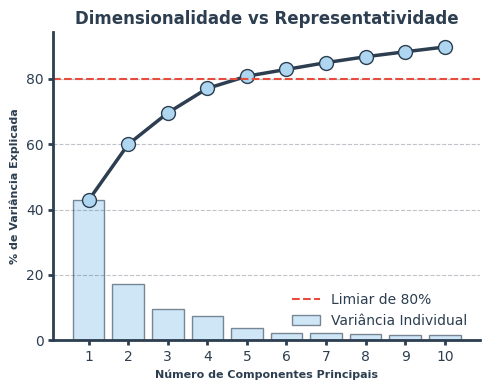

In [9]:
pca_var = PCA(n_components=10) # Testando com 10 componentes
pca_var.fit(X_scaled)

cum_var = np.cumsum(pca_var.explained_variance_ratio_) * 100

plt.figure(figsize=(5, 4))

plt.plot(range(1, 11), cum_var, 
         color='#2c3e50', linewidth=2.5, marker='o', 
         markerfacecolor='#AED6F1', markeredgecolor='#2c3e50', markersize=10)

plt.bar(range(1, 11), pca_var.explained_variance_ratio_ * 100, 
        color='#AED6F1', edgecolor='#2c3e50', alpha=0.6, label='Variância Individual')

plt.title('Dimensionalidade vs Representatividade', fontsize=12, fontweight='bold', color='#2c3e50')
plt.xlabel('Número de Componentes Principais', fontsize=8, fontweight='bold', color='#2c3e50')
plt.ylabel('% de Variância Explicada', fontsize=8, fontweight='bold', color='#2c3e50')
plt.xticks(range(1, 11))
plt.axhline(y=80, color='#E74C3C', linestyle='--', label='Limiar de 80%')

ax = plt.gca()
ax.spines['bottom'].set_color('#2c3e50'); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('#2c3e50'); ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
ax.tick_params(colors='#2c3e50', width=2)
plt.legend(frameon=False, labelcolor='#2c3e50')
plt.grid(axis='y', linestyle='--', alpha=0.3, color='#2c3e50')
plt.tight_layout()
plt.show()


In [10]:
# Padronização
scaler = StandardScaler()

# 2. PCA com 3 Componentes
pca = PCA(n_components=3)
pca.fit(X_scaled)

# Cálculo da Variância Total
var_total = sum(pca.explained_variance_ratio_) * 100
var_per_pc = pca.explained_variance_ratio_ * 100

print('Variância Total:', f'{var_total:.2f}%')

Variância Total: 69.59%


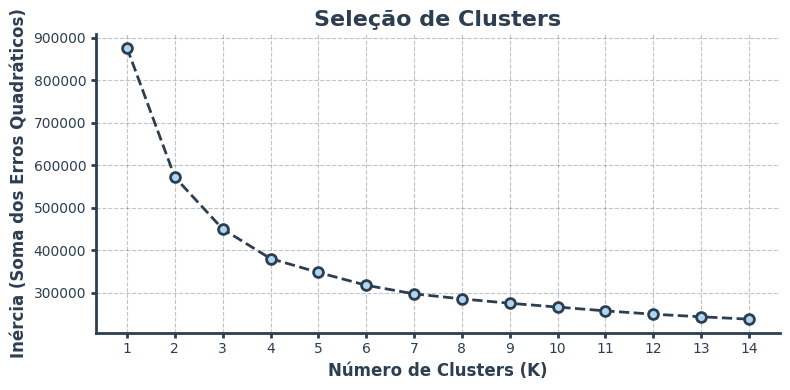

In [11]:
# Loop para testar diferentes K (de 1 a 15)
inertias = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))

plt.plot(
    k_range, inertias, 
    color='#2c3e50', 
    linestyle='--', 
    linewidth=2, 
    zorder=1
)

plt.scatter(
    k_range, inertias, 
    color='#AED6F1',
    edgecolor='#2c3e50',
    s=50,
    linewidth=2,          
    zorder=2
)

plt.title('Seleção de Clusters', fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel('Número de Clusters (K)', fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel('Inércia (Soma dos Erros Quadráticos)', fontsize=12, fontweight='bold', color='#2c3e50')

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2); ax.spines['bottom'].set_color('#2c3e50')
ax.spines['left'].set_linewidth(2); ax.spines['left'].set_color('#2c3e50')
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)

ax.tick_params(width=2, colors='#2c3e50')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.3, color='#2c3e50')

plt.tight_layout()
plt.show()

In [12]:
X_pca = pca.fit_transform(X_scaled) 

# Cálculo da Variância Total
var_total = sum(pca.explained_variance_ratio_) * 100
print(f'Variância Total Explicada: {var_total:.2f}%')

# 3. KMeans (Gerando os Grupos)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

Variância Total Explicada: 69.59%


In [13]:
df_viz = df.loc[numeric_df.index].copy()

df_viz['PC1'] = X_pca[:, 0]
df_viz['PC2'] = X_pca[:, 1]
df_viz['PC3'] = X_pca[:, 2]

cluster_map = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}
df_viz['Cluster'] = [cluster_map[l] for l in labels]

In [14]:
fig = px.scatter_3d(
    df_viz, 
    x='PC1', y='PC2', z='PC3',
    color='Cluster',
    
    hover_name='name',  
    hover_data={'position': True, 'ovr': True, 'PC1': False, 'PC2': False, 'PC3': False, 'Cluster': False},
    
    color_discrete_map={
        'Cluster 1': '#AED6F1', 
        'Cluster 2': '#F5B7B1', 
        'Cluster 3': '#A9DFBF', 
        'Cluster 4': '#D7BDE2'
    },
    
    title='Clusterização 3D',
    opacity=1,
    height=500
)

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='#2c3e50', family="Arial"),
    title_font=dict(size=20, color='#2c3e50', family="Arial Black"),
    legend=dict(font=dict(size=12, color='#2c3e50')),
    scene=dict(
        xaxis=dict(backgroundcolor="white", gridcolor="#2c3e50", showbackground=True, title='PC1'),
        yaxis=dict(backgroundcolor="white", gridcolor="#2c3e50", showbackground=True, title='PC2'),
        zaxis=dict(backgroundcolor="white", gridcolor="#2c3e50", showbackground=True, title='PC3'),
    )
)

fig.update_traces(marker=dict(size=3, line=dict(width=0)))

fig.show()

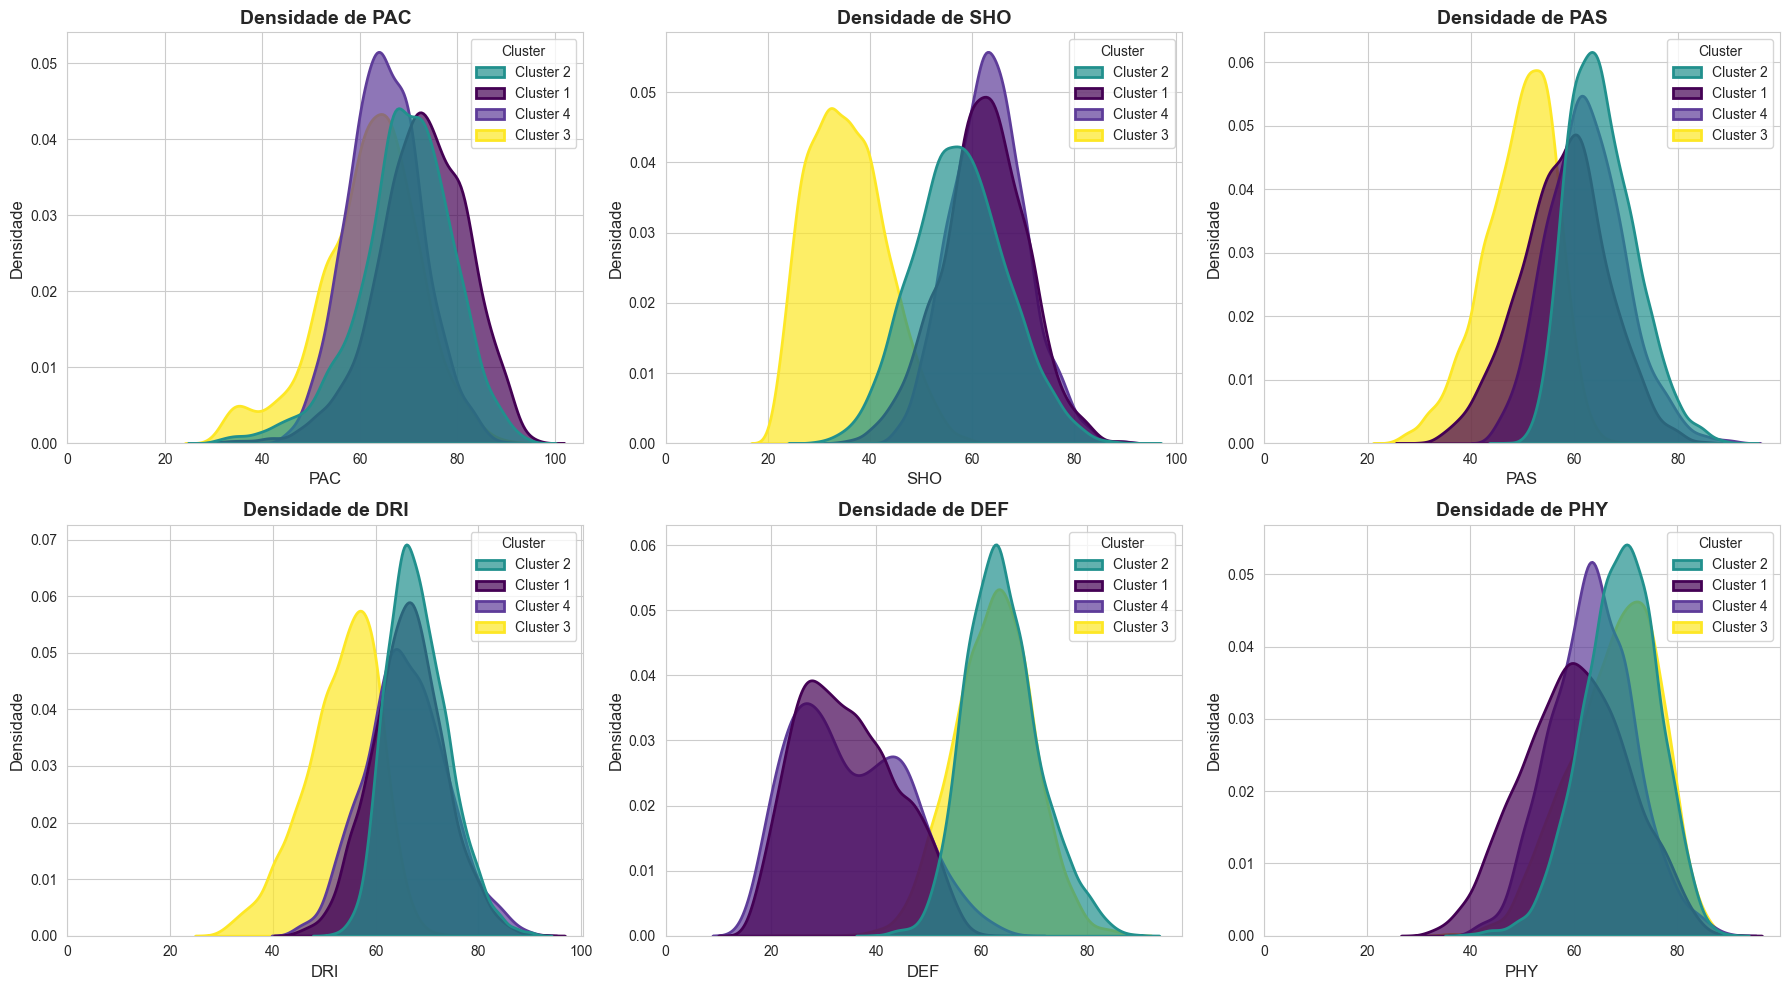

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o estilo do seaborn para 'whitegrid' para obter o fundo branco com grade
sns.set_style("whitegrid")

# Atributos a serem plotados
attributes = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']

# Nova paleta de cores semelhante à imagem de exemplo (Roxo, Verde, Amarelo)
cluster_colors_gmm_style = {
    'Cluster 1': '#440154', # Roxo escuro
    'Cluster 2': '#21908d', # Verde azulado
    'Cluster 3': '#fde725', # Amarelo brilhante
    'Cluster 4': '#5e3c99'  # Um roxo diferente para o 4º cluster (se houver)
}

# Configuração da figura (2 linhas x 3 colunas)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Loop para criar cada gráfico KDE
for i, attr in enumerate(attributes):
    if attr in df_viz.columns:
        sns.kdeplot(
            data=df_viz,
            x=attr,
            hue='Cluster',
            palette=cluster_colors_gmm_style,
            fill=True,
            alpha=0.7, # Opacidade alta para preenchimento sólido
            linewidth=2,
            ax=axes[i],
            common_norm=False,
            warn_singular=False
        )

        # Estilização dos títulos e rótulos
        axes[i].set_title(f'Densidade de {attr.upper()}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(attr.upper(), fontsize=12)
        axes[i].set_ylabel('Densidade', fontsize=12)

        # Ajuste dos ticks e limites (opcional, para refinar)
        axes[i].tick_params(axis='both', which='major', labelsize=10)
        axes[i].set_xlim(left=0) # Garante que o eixo X comece em 0 (ou ajuste conforme dados)


plt.tight_layout() # Ajusta o espaçamento entre os subplots
plt.show()

In [26]:
cols_to_show = ['name', 'Cluster', 'ovr', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']

# 1. Ordena por Cluster e depois por OVR (do maior para o menor)
# 3. Pega os 5 primeiros de cada grupo
df_exemplos = df_viz.sort_values(['Cluster', 'ovr'], ascending=[True, False]) \
                    .groupby('Cluster') \
                    .head(5)[cols_to_show]

df_exemplos = df_exemplos.reset_index(drop=True)


display(df_exemplos)

,name,Cluster,ovr,pac,sho,pas,dri,def,phy
0,Kylian Mbappé,Cluster 1,91,97,90,81,92,37,76
1,Ousmane Dembélé,Cluster 1,90,91,88,83,93,50,69
2,Erling Haaland,Cluster 1,90,86,91,70,80,45,88
3,Lamine Yamal,Cluster 1,89,85,81,86,90,23,53
4,Vini Jr.,Cluster 1,89,95,84,81,91,29,69
5,Mohamed Salah,Cluster 2,91,89,88,86,90,45,76
6,Rodri,Cluster 2,90,65,80,86,84,86,85
7,Virgil van Dijk,Cluster 2,90,73,60,72,72,90,87
8,Jude Bellingham,Cluster 2,90,80,86,83,90,78,85
9,Raphinha,Cluster 2,89,91,84,85,87,53,75
